## Task 4.10 Coding Etiquette & Excel Reporting (PART 1)

### The script contain the following points:

1A)Importing libraries to computer (Pandas, NumPy, OS, Matplotlib, Seaborn, and Scipy)

1B)Importing 'cus_ords_prods' dataset / Checking if data was imported properly

2)Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

3)The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set

4)The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

5)Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

6)Create an appropriate visualization to show the distribution of profiles.

7)Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

8)Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

9)Produce suitable charts to illustrate your results and export them in your project folder (IN ANOTHER NOTEBOOK / Would often crash when trying to produce this graph) 

10)Tidy up your script, export your final data set, and save your notebook

## 01A. Importing libraries to computer (Pandas, NumPy, OS, Matplotlib, Seaborn, and Scipy)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01B. Importing 'cus_ords_prods' dataset / Checking if data was imported properly

In [2]:
# Creating a data importing shortcut called 'path' for the Instacart folder to make importing data easier and cleaner
path =r'/Users/drewsmith/Desktop/01-2023 Instacart Basket Analysis'

In [3]:
# Utilizing the created 'path' shortcut to import the 'cus_ords_prods' dataset 
instacart_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cus_ords_prods.pkl'))

In [4]:
# Shows first 5 rows of dataset
instacart_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marriage_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# Doesn't assign any options to the max number of columns so the 'head()' function can display all columns
pd.options.display.max_columns = None

In [6]:
# Shows count of rows and columns to see if data was exported properly
instacart_data.shape

(32404859, 34)

In [7]:
# Shows data types for all columns
instacart_data.dtypes

order_id                      int64
user_id                       int64
order_number                  int64
orders_day_of_week            int64
order_hour_of_day             int64
days_since_prior_order      float64
new_customer                   bool
product_id                    int64
add_to_cart_order             int64
reordered                     int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
_merge                     category
price_range_loc              object
busiest_day                  object
busiest_days                 object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
spending_flag                object
avg_user_price              float64
median_days_prior_order     float64
order_frequency_flag         object
first_name                   object
last_name                    object
gender                      

In [8]:
# Replaces any prices over 100 as NaNs
instacart_data.loc[instacart_data['prices'] >100, 'prices'] = np.nan

In [9]:
# Now the max of the datast is realistic and won't negatively affect analysis
instacart_data['prices'].max()

25.0

## 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

In [10]:
# Removed first and last name columns because it contained 'PII'
insta_df = instacart_data.drop(columns = ['first_name', 'last_name'])

In [11]:
# Check if column removal worked
insta_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marriage_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [12]:
# Noticed a few more columns could be removed since they are unnecessary
insta_df1 = insta_df.drop(columns = ['new_customer', '_merge'])

In [13]:
# Check if column removal worked
insta_df1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marriage_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [14]:
# Check if number columns decreased accordingly
insta_df1.shape

(32404859, 30)

## 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set

In [15]:
# Check frequency for state column
insta_df1['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [16]:
# Assigning each region abbreviation with a list of states
NE = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [17]:
MW = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [18]:
S = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [19]:
W = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [20]:
# Using loc function to assign states in a region under a corresponding region name
insta_df1.loc[insta_df1['state'].isin (NE), 'region'] = 'Northeast'

In [21]:
# Using loc function to assign states in a region under a corresponding region name
insta_df1.loc[insta_df1['state'].isin (MW), 'region'] = 'Midwest'

In [22]:
# Using loc function to assign states in a region under a corresponding region name
insta_df1.loc[insta_df1['state'].isin (S), 'region'] = 'South'

In [23]:
# Using loc function to assign states in a region under a corresponding region name
insta_df1.loc[insta_df1['state'].isin (W), 'region'] = 'West'

In [24]:
# See if new column and values are implemented properly
insta_df1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marriage_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [25]:
# Shows counts of values for the created regions in the new column
insta_df1['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [26]:
#Finds counts of users between the different U.S regions based on spending_flag
region_spending = pd.crosstab(insta_df1['region'], insta_df1['spending_flag'], dropna = False)

In [27]:
region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155968,7441357
Northeast,108200,5614536
South,209691,10582194
West,160354,8132559


### Answer: Yes, there is a difference in spending habits between U.S. regions. Overall, there are a lot more low spenders than high spenders. The south region has the highest counts of both spender types while the northeast region has the lowest counts of both spender types. 

## 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [28]:
# Uses loc function to group values under and over 5 orders in the 'max_order' column to consider them as low or high activity
insta_df1.loc[insta_df1['max_order'] < 5, 'exclusion_flag'] = 'Low-activity'

In [29]:
insta_df1.loc[insta_df1['max_order'] >= 5, 'exclusion_flag'] = 'High-activity'

In [30]:
# Shows counts of values for the created customer activity values in the new column
insta_df1['exclusion_flag'].value_counts(dropna = False)

High-activity    30964564
Low-activity      1440295
Name: exclusion_flag, dtype: int64

In [31]:
# See if new column and values are working
insta_df1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marriage_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


In [32]:
# Dropping low-activity users from dataframe
insta_df2 = insta_df1.drop(insta_df1[insta_df1.max_order < 5].index)

In [33]:
insta_df1.shape

(32404859, 32)

In [34]:
# Shows that significantly less rows are in the updated dataframe
insta_df2.shape

(30964564, 32)

In [35]:
# Export new data frame without low-activity users
insta_df2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_act_cus.pkl'))

## 05. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### --AGE

In [36]:
# Shows descriptive statistics for this column so profiling variables can be created
insta_df1['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### How I am categorizing age groups

1) Age 18-24 = Young adult

2) Age 25-39 = Adult

3) Age 40-64 = Middle age

4) Age 65-81 = Senior

In [37]:
# Uses loc function to group age groups under a value name
insta_df1.loc[insta_df1['age'] <= 24, 'age_flag'] = 'Young adult'

In [38]:
insta_df1.loc[(insta_df1['age'] <= 39) & (insta_df1['age'] >= 25), 'age_flag'] = 'Adult'

In [39]:
insta_df1.loc[(insta_df1['age'] <= 64) & (insta_df1['age'] >= 40), 'age_flag'] = 'Middle age'

In [40]:
insta_df1.loc[insta_df1['age'] >= 65, 'age_flag'] = 'Senior'

In [41]:
# Check value counts per age group
insta_df1['age_flag'].value_counts(dropna = False)

Middle age     12665583
Senior          8575084
Adult           7591191
Young adult     3573001
Name: age_flag, dtype: int64

### --INCOME

In [42]:
# Shows descriptive statistics for this column so profiling variables can be created
insta_df1['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

### How I am categorizing income groups

1) 32,048 or less = Low class

2) 32,049- 53,413 = Lower-middle class

3) 53,414- 106,827 = Middle class

4) 106,828- 373,894 = Upper-middle class 

5) 373,895 or more = Wealthy class

In [43]:
# Uses loc function to group customer incomes under a value name
insta_df1.loc[insta_df1['income'] <= 32048, 'income_flag'] = 'Low class'

In [44]:
insta_df1.loc[(insta_df1['income'] <= 53413) & (insta_df1['income'] >= 32049), 'income_flag'] = 'Lower-middle class'

In [45]:
insta_df1.loc[(insta_df1['income'] <= 106827) & (insta_df1['income'] >= 53414), 'income_flag'] = 'Middle class'

In [46]:
insta_df1.loc[(insta_df1['income'] <=373894 ) & (insta_df1['income'] >= 106828), 'income_flag'] = 'Upper-middle class'

In [47]:
insta_df1.loc[insta_df1['income'] >= 373895, 'income_flag'] = 'Wealthy class'

In [48]:
# Check value counts per income group
insta_df1['income_flag'].value_counts(dropna = False)

Middle class          15246357
Upper-middle class    12811528
Lower-middle class     3764233
Low class               523753
Wealthy class            58988
Name: income_flag, dtype: int64

### --DEPARTMENT_ID

In [49]:
# Shows descriptive statistics for this column so profiling variables can be created
insta_df1['department_id'].describe()

count    3.240486e+07
mean     9.919792e+00
std      6.281485e+00
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.600000e+01
max      2.100000e+01
Name: department_id, dtype: float64

In [50]:
# Check value counts per department_id
insta_df1['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [51]:
# Importing departments_wrangled dataset to see what each department_id represents
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [52]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [53]:
# Renaming column Unnamed: 0 to department_id
df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [54]:
# I now know what each department_id represents 
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### -- A flag isn't necessary for the department_ids since I will utilize the 'pets' department individually in the loc fuctions below

### --NUM_OF_DEPENDANTS

In [55]:
# Shows descriptive statistics for this column so profiling variables can be created
insta_df1['num_of_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependants, dtype: float64

In [56]:
# Check value counts per num_of_dependants
insta_df1['num_of_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: num_of_dependants, dtype: int64

### How I am categorizing customers with numbers of dependants 

1) 0 = No-dependants

2) 1-3 = Dependants

### - I was curious to see which customers are more likely to own a pet. I figured whether someone is in a family or their marriage status could provide insights into who would own a pet.  So I created a profiling variable for customers based on whether they have shopped in the pet department before or not  and categorizing them by 'marriage_status' & 'num_of_dependants'. 

In [57]:
# Shows counts of values for each marriage_status
insta_df1['marriage_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marriage_status, dtype: int64

In [58]:
# Using loc function to group customers based on whether they have a pet or not in conjuction with their marriage status and number of dependants
insta_df1.loc[(insta_df1['department_id'] == 8) & (insta_df1['num_of_dependants'] <= 0) & (insta_df1['marriage_status'] == 'single'), 'pet_owner_flag'] = 'Single w/ pet'

In [59]:
insta_df1.loc[(insta_df1['department_id'] == 8) & (insta_df1['num_of_dependants'] > 0) & (insta_df1['marriage_status'] == 'married'), 'pet_owner_flag'] = 'Family w/ pet'

In [60]:
insta_df1.loc[(insta_df1['department_id'] != 8) & (insta_df1['num_of_dependants'] > 0) & (insta_df1['marriage_status'] == 'married'), 'pet_owner_flag'] = 'Family w/out pet'

In [61]:
insta_df1.loc[(insta_df1['department_id'] != 8) & (insta_df1['num_of_dependants'] <= 0) & (insta_df1['marriage_status'] == 'single'), 'pet_owner_flag'] = 'Single w/out pet'

In [62]:
insta_df1.loc[(insta_df1['department_id'] != 8) & (insta_df1['num_of_dependants'] <= 0) & (insta_df1['marriage_status'] == 'divorced/widowed'), 'pet_owner_flag'] = 'Single w/out pet'

In [63]:
insta_df1.loc[(insta_df1['department_id'] == 8) & (insta_df1['num_of_dependants'] <= 0) & (insta_df1['marriage_status'] == 'divorced/widowed'), 'pet_owner_flag'] = 'Single w/ pet'

In [64]:
insta_df1.loc[(insta_df1['department_id'] != 8) & (insta_df1['num_of_dependants'] > 0) & (insta_df1['marriage_status'] == 'living with parents and siblings'), 'pet_owner_flag'] = 'Family w/out pet'

In [65]:
insta_df1.loc[(insta_df1['department_id'] == 8) & (insta_df1['num_of_dependants'] > 0) & (insta_df1['marriage_status'] == 'living with parents and siblings'), 'pet_owner_flag'] = 'Family w/ pet'

### -The customers who fall under family are people who live with a family so those who are married and have dependants or dependants who live with parents and siblings will fall in that category. I combined the single and divorced/widowed customers into 'single' since they both don't have any dependants in the entire dataset which means they don't live with a family. 

In [66]:
insta_df1.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,marriage_status,income,region,exclusion_flag,age_flag,income_flag,pet_owner_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,Lower-middle class,Family w/out pet


In [67]:
# Shows counts of values for the created pet_owner_flag variables
insta_df1['pet_owner_flag'].value_counts(dropna = False)

Family w/out pet    24234223
Single w/out pet     8072920
Family w/ pet          73133
Single w/ pet          24583
Name: pet_owner_flag, dtype: int64

In [68]:
insta_df1.shape

(32404859, 35)

In [69]:
# Exporting Dataframe
insta_df1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_insta_df.pkl'))

## 06. Create an appropriate visualization to show the distribution of profiles.

<AxesSubplot:>

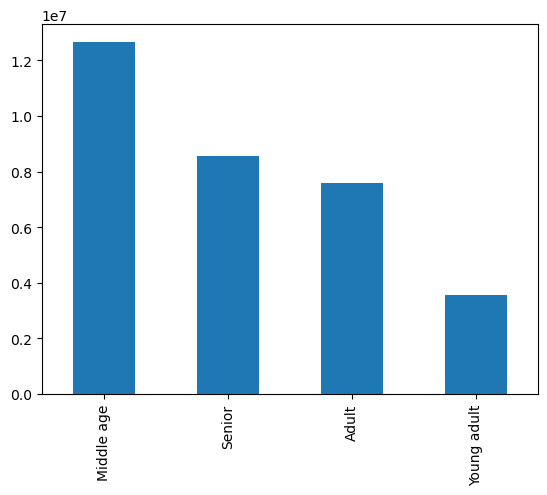

In [70]:
# Create bar chart for age_flag 
insta_df1['age_flag'].value_counts().plot.bar()

<AxesSubplot:>

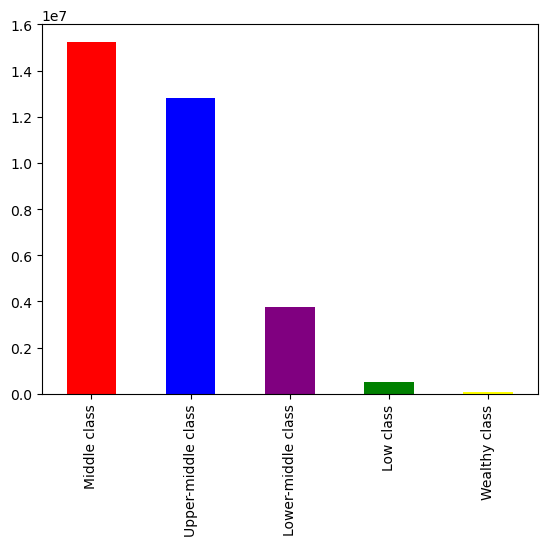

In [71]:
# Create bar chart for income_flag
insta_df1['income_flag'].value_counts().plot.bar(color = ['red', 'blue', 'purple', 'green', 'yellow'])

### - Chart for new column 'pet_owner_flag'

<AxesSubplot:>

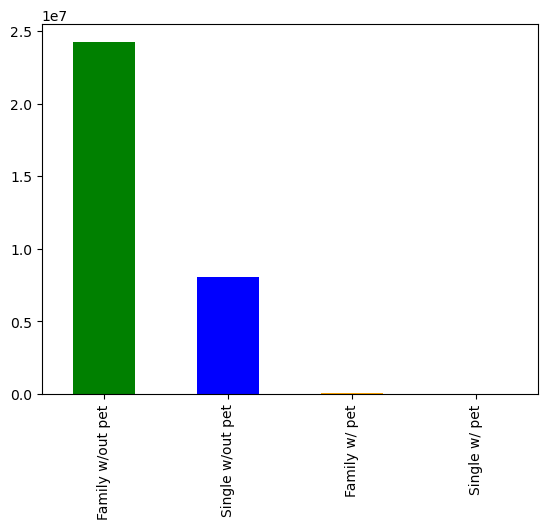

In [72]:
# Create bar chart for pet_owner_flag
insta_df1['pet_owner_flag'].value_counts().plot.bar(color = ['green', 'blue', 'orange', 'purple'])

### - It's apparent that many pet owners don't shop with instacart! 

## 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [73]:
# aggregating min, max, mean of num_of_dependants and department_id thats grouped by the pet_owner_flag
insta_df1.groupby('pet_owner_flag').agg({'num_of_dependants': ['mean', 'min', 'max']})

num_of_dependants        
                              mean min max
pet_owner_flag                            
Family w/ pet             1.990620   1   3
Family w/out pet          2.002257   1   3
Single w/ pet             0.000000   0   0
Single w/out pet          0.000000   0   0

In [74]:
insta_df1.groupby('pet_owner_flag').agg({'department_id': ['mean', 'min', 'max']})

department_id        
                          mean min max
pet_owner_flag                        
Family w/ pet         8.000000   8   8
Family w/out pet      9.929010   1  21
Single w/ pet         8.000000   8   8
Single w/out pet      9.915359   1  21

## 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [75]:
# Shows counts of region per pet_owner_flag category 
pet_region_crosstab = pd.crosstab(insta_df1['pet_owner_flag'], insta_df1['region'], dropna = False)

In [76]:
pet_region_crosstab

region,Midwest,Northeast,South,West
pet_owner_flag,,,,
Family w/ pet,16874,13319,24093,18847
Family w/out pet,5675251,4291116,8066133,6201723
Single w/ pet,5481,5282,7176,6644
Single w/out pet,1899719,1413019,2694483,2065699


In [77]:
# Shows counts of department_id per pet_owner_flag category
pet_department_crosstab = pd.crosstab(insta_df1['pet_owner_flag'], insta_df1['department_id'], dropna = False)

In [78]:
pet_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
pet_owner_flag,,,,,,,,,,,,,,,,,,,,,
Family w/ pet,0,0,0,0,0,0,0,73133,0,0,0,0,0,0,0,0,0,0,0,0,0
Family w/out pet,1677583,27116,878023,7103846,114578,201540,2013681,0,651365,26295,335566,534843,1408612,528456,803220,4049385,557893,317308,2166752,786104,52057
Single w/ pet,0,0,0,0,0,0,0,24583,0,0,0,0,0,0,0,0,0,0,0,0,0
Single w/out pet,557160,9175,294405,2375445,39118,67713,674442,0,215262,8278,112006,174084,466757,174577,264838,1349362,180773,106494,720798,265145,17088


### Answer: Obviously there isn't much of a link between region and department since I singled out the pet department for pet owners. Regarding the region by itself, it makes sense why the most counts for pet owners where found in the south simply due to warmer weather and open land. 

## 09. Produce suitable charts to illustrate your results and export them in your project folder (IN ANOTHER NOTEBOOK / Would often crash when trying to produce this graph) 

## 10. Tidy up your script, export your final data set, and save your notebook

In [79]:
# Exporting final dataframe
insta_df1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_insta_data.pkl'))